# Model Training - MobileNetV3 (transfer)

### 0. Imports

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.applications import MobileNetV3Large
from keras.applications.mobilenet_v3 import preprocess_input
from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.metrics import Precision, Recall
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

### 1. Paths

In [4]:
# DATASET_BASE_TRAIN_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_merged"
DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_merged_cleaned"

# DATASET_BASE_TRAIN_PATH = "../new_data"

# DATASET_BASE_TEST_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/test_resized"
DATASET_BASE_TEST_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/test_resized"

### 2. Data preprocessing

In [3]:
batch_size  = 32
img_size = 224

train_validation_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = train_validation_data_generator.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True,
)

validation_generator = train_validation_data_generator.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=True,
)

Found 23689 images belonging to 7 classes.
Found 5919 images belonging to 7 classes.


### 5. Model creating

In [4]:
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [5]:
checkpoint = ModelCheckpoint(
    filepath="./model_mobilenet_v3_transfer.h5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1,
    min_lr=0.00001,
)

callbacks_list = [early_stopping, checkpoint, reduce_learning_rate]

In [6]:
model = Sequential()

base_model = MobileNetV3Large(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
model.add(base_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

12683000/12683000 [==============================] - 2s 0us/step


In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Precision(class_id=0, name='precision_angry'),
        Precision(class_id=1, name='precision_disgust'),
        Precision(class_id=2, name='precision_fear'),
        Precision(class_id=3, name='precision_happy'),
        Precision(class_id=4, name='precision_neutral'),
        Precision(class_id=5, name='precision_sad'),
        Precision(class_id=6, name='precision_surprise'),
        Recall(name='recall'),
        Recall(class_id=0, name='recall_angry'),
        Recall(class_id=1, name='recall_disgust'),
        Recall(class_id=2, name='recall_fear'),
        Recall(class_id=3, name='recall_happy'),
        Recall(class_id=4, name='recall_neutral'),
        Recall(class_id=5, name='recall_sad'),
        Recall(class_id=6, name='recall_surprise'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 960)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               492032    
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 3,491,975
Trainable params: 3,467,575
Non-trainable params: 24,400
_________________________________________________________________


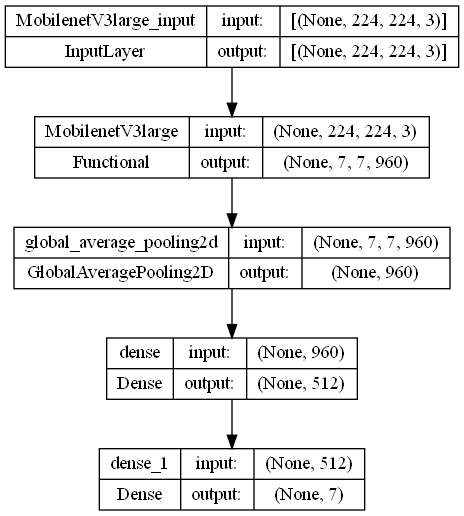

In [11]:
plot_model(model, to_file='model_mobilenet_v3_transfer.png', show_shapes=True, show_layer_names=True)

### 6. Model training

In [12]:
epochs = 50

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list,
)

Epoch 1/50
740/740 [==============================] - ETA: 0s - loss: 1.2008 - accuracy: 0.5563 - precision: 0.7329 - precision_angry: 0.6288 - precision_disgust: 0.6667 - precision_fear: 0.6195 - precision_happy: 0.8434 - precision_neutral: 0.6322 - precision_sad: 0.5675 - precision_surprise: 0.7519 - recall: 0.3694 - recall_angry: 0.2084 - recall_disgust: 0.1109 - recall_fear: 0.1130 - recall_happy: 0.7162 - recall_neutral: 0.3125 - recall_sad: 0.1740 - recall_surprise: 0.5492
Epoch 1: val_loss improved from inf to 4.01371, saving model to .\model_mobilenet_v3_transfer.h5
740/740 [==============================] - 1002s 1s/step - loss: 1.2008 - accuracy: 0.5563 - precision: 0.7329 - precision_angry: 0.6288 - precision_disgust: 0.6667 - precision_fear: 0.6195 - precision_happy: 0.8434 - precision_neutral: 0.6322 - precision_sad: 0.5675 - precision_surprise: 0.7519 - recall: 0.3694 - recall_angry: 0.2084 - recall_disgust: 0.1109 - recall_fear: 0.1130 - recall_happy: 0.7162 - recall_neu

### 7. Evaluation - Test set

In [5]:
from keras.models import load_model

model = load_model("model_mobilenet_v3_transfer.h5")

In [6]:
test_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_data_generator.flow_from_directory(
    DATASET_BASE_TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [7]:
model.evaluate(test_generator)

225/225 [==============================] - 78s 336ms/step - loss: 1.4144 - accuracy: 0.6332 - precision: 0.6605 - precision_angry: 0.5955 - precision_disgust: 0.7460 - precision_fear: 0.4706 - precision_happy: 0.8187 - precision_neutral: 0.6076 - precision_sad: 0.5549 - precision_surprise: 0.8293 - recall: 0.6162 - recall_angry: 0.5303 - recall_disgust: 0.4234 - recall_fear: 0.4688 - recall_happy: 0.8805 - recall_neutral: 0.5929 - recall_sad: 0.4419 - recall_surprise: 0.6546


[1.414367437362671,
 0.6331847310066223,
 0.6605436205863953,
 0.5955451130867004,
 0.7460317611694336,
 0.47058823704719543,
 0.8186582922935486,
 0.6076475381851196,
 0.5548841953277588,
 0.8292682766914368,
 0.6161883473396301,
 0.5302714109420776,
 0.4234234094619751,
 0.46875,
 0.8804960250854492,
 0.5928629636764526,
 0.44186046719551086,
 0.6546329855918884]